# Let's create a quantum circuit that represents an arbitrary vector.  


### Le vecteur d'état
L'état d'un systeme est représenté par un vecteur que l'on va representer par cette notation |𝜓〉. Celui-ci est choisi pour être normalisé et |〈𝜓|𝜓〉|² = 1. C'est ce qu'on appelle le vecteur d'état du système. 〈𝜓| etant le vecteur dual

Ces vecteurs d'état comme |𝜓〉sont appelés « kets », nom proposé par Paul Dirac ; cela fait partie du mot « BraKet ». Cette façon d'écrire les vecteurs d'état en mécanique quantique est appelée la notation Dirac.

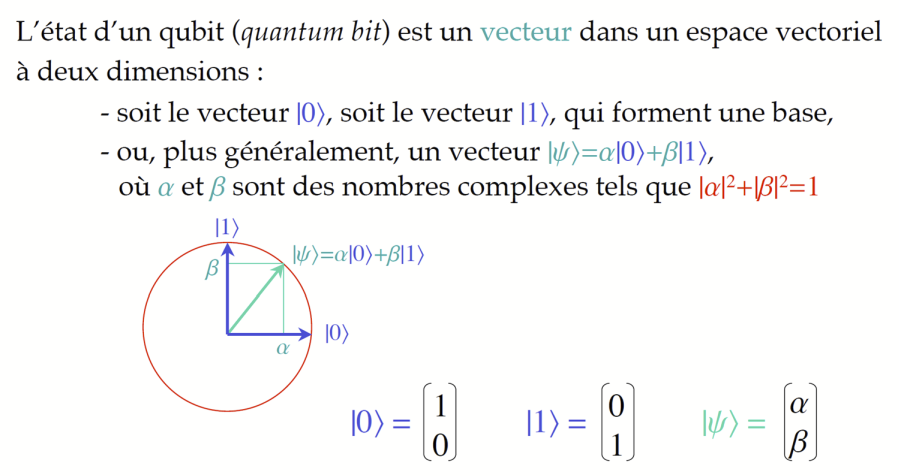 

# Example de definition d'un vecteur (un Statevector)


In [1]:
from sympy import init_printing, Matrix, sqrt, symbols
import qiskit
import numpy as np
Vector = qiskit.quantum_info.Statevector([np.sqrt(2)/2, -np.sqrt(2)/2])
Vector.draw('latex')

<IPython.core.display.Latex object>

## The Dirac Notation

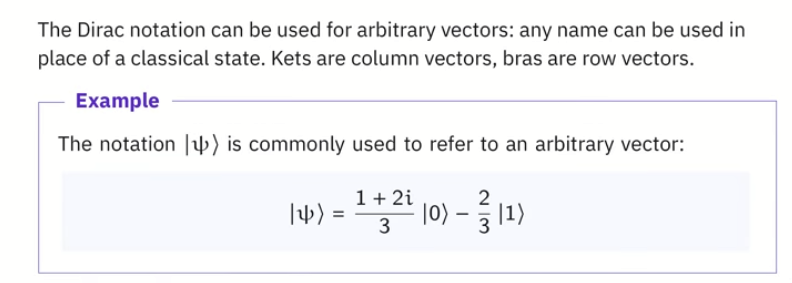

###  Le but est donc de representer l'etat $ {\displaystyle |\psi\rangle }$ avec un circuit quantique en utilisant le SDK Qiskit

### Nous savons que les kets forment un espace vectoriel complexe.
Ainsi, si $\alpha$ et $\beta$ sont des nombres complexes quelconques et ${\displaystyle |u_{1}\rangle }$ et ${\displaystyle |u_{2}\rangle }$ sont deux kets, alors

$ {\displaystyle |\psi\rangle }$ = $\alpha$ ${\displaystyle |u_{1}\rangle }$ + $\beta$ ${\displaystyle |u_{2}\rangle }$ est également un ket. 


In [2]:
# representons 𝛼 et 𝛽 en tant que nombres complexes
import numpy as np
𝛼 = complex(1/3,2/3)
𝛽 = complex(-2/3,0)

In [3]:
print("This is 𝛼", 𝛼)
print("This is 𝛽", 𝛽)

This is 𝛼 (0.3333333333333333+0.6666666666666666j)
This is 𝛽 (-0.6666666666666666+0j)


### On peut representer un vecteur avec Qiskit en utilisant la fonction .Statevector() 

In [4]:
# Example de definition et d'initialisation d'un vecteur (que l'on appelle un Statevector)
import qiskit
import numpy as np
Vector = qiskit.quantum_info.Statevector([np.sqrt(2)/2, -np.sqrt(2)/2])
𝜆1=[np.sqrt(2)/2]
𝜆2=[-np.sqrt(2)/2]
Vector = qiskit.quantum_info.Statevector([𝜆1, 𝜆2])
Vector.draw('latex')

<IPython.core.display.Latex object>

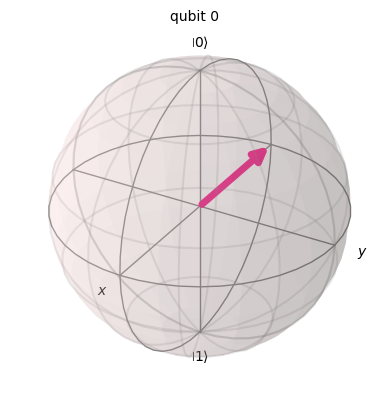

In [5]:
# Nous pouvons representer ce Statevector sur la sphere de bloch 
Vector.draw('bloch')

### Jouons avec Qiskit pour representer un circuit de 2 qubits avec un etat de preparation. 

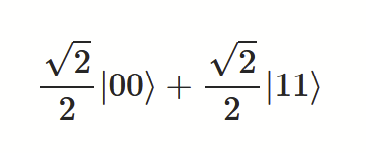

### Premiere etape 
Construisons l'etat $|00〉$ + $|11〉 $ 

Nous savons que l'etat 0 est un vecteur $ \begin{eqnarray*}|0\rangle = \begin{bmatrix}{}1 \\0 \\\end{bmatrix}\end{eqnarray*} $
et l'etat 1 est un vecteur $ \begin{eqnarray*}|1\rangle = \begin{bmatrix}{}0 \\1 \\\end{bmatrix}\end{eqnarray*} $ 

l'etat $ \begin{eqnarray*}|00\rangle\end{eqnarray*}$ est $ \begin{eqnarray*}|0\rangle\end{eqnarray*}$ ⊗ $ \begin{eqnarray*}|0\rangle\end{eqnarray*}$  C'est ce qu'on appelle le produit tensoriel de 2 vecteurs 

Les 4 différents vecteurs correspondants aux 4 états possibles d’un système à 2 qubits se retrouvent grâce au produit tensoriel (tensor product) :
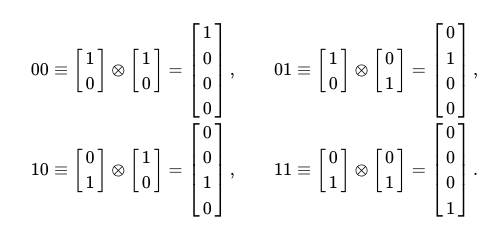

Donc $|00〉$ + $|11〉$ = $\begin{eqnarray*}\begin{bmatrix}{}1 \\0 \\0\\0\end{bmatrix}\end{eqnarray*}$ + $\begin{eqnarray*}\begin{bmatrix}{}0 \\0 \\0\\1\end{bmatrix}\end{eqnarray*}$ = $\begin{eqnarray*}\begin{bmatrix}{}1 \\0 \\0\\1\end{bmatrix}\end{eqnarray*}$ 

et l'etat final etant $\begin{eqnarray*}\begin{bmatrix}{} \sqrt{2}/2 \\0 \\0\\\sqrt{2}/2\end{bmatrix}\end{eqnarray*}$ 



Nous savons construire cet etat comme vu precedemment 

In [6]:
from qiskit import QuantumCircuit
import numpy as np
# creons les valeurs 
𝜆1=1/np.sqrt(2)
𝜆2=0
𝜆3= 0
𝜆4= 1/np.sqrt(2)
Vector = qiskit.quantum_info.Statevector([𝜆1, 𝜆2, 𝜆3, 𝜆4])
# Printons la matrice 
Matrix(Vector)


Matrix([
[0.707106781186547],
[                0],
[                0],
[0.707106781186547]])

In [7]:
# Et le vecteur d'etat 
Vector.draw('latex')

<IPython.core.display.Latex object>

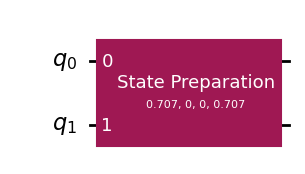

In [8]:
# StatePreparation est une Classe qui implémente la préparation d'état (d'amplitude complexe) d'une collection flexible de registres de qubits
from qiskit.circuit.library import StatePreparation
circuit_prepared = QuantumCircuit(2) 

initialization = StatePreparation(Vector)
initialization
circuit_prepared.append(initialization, [0,1])
circuit_prepared.draw('mpl')

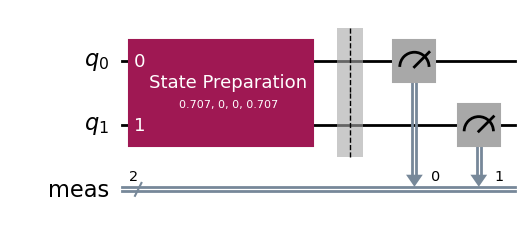

In [9]:
# Rajoutons une mesure a notre circuit 
circuit_prepared.measure_all()
circuit_prepared.draw('mpl')

Une mesure est un processus irréversible qui brise la coherence d’etats $ {\displaystyle |\psi\rangle }$ du qubit et le projette dans l’un des etats de la base de calcul $ {\displaystyle |0\rangle }$ ou $ {\displaystyle |1\rangle }$. Le resultat de la mesure correspond a l’etat dans lequel le qubit a
ete projeté
- soit l’etat $ {\displaystyle |0\rangle }$ avec la probabilité $|\lambda _{1}|^2 $ 
- ou l’´etat $ {\displaystyle |1\rangle }$ avec la probabilité $|\lambda _{2}|^2$ 


## Nous pouvons maintenant executer ce circuit sur un Quantum Backend

In [10]:
from qiskit_ibm_provider import IBMProvider
provider = IBMProvider(instance='ibm-q/open/main')
provider.backends()

[<IBMBackend('simulator_mps')>,
 <IBMBackend('simulator_stabilizer')>,
 <IBMBackend('ibm_sherbrooke')>,
 <IBMBackend('ibm_kyoto')>,
 <IBMBackend('ibm_osaka')>,
 <IBMBackend('ibmq_qasm_simulator')>,
 <IBMBackend('simulator_extended_stabilizer')>,
 <IBMBackend('simulator_statevector')>,
 <IBMBackend('ibm_brisbane')>]

In [11]:
backend = provider.get_backend('ibmq_qasm_simulator')

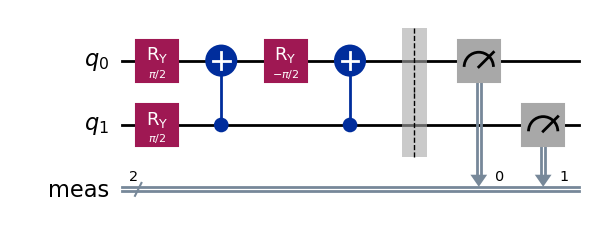

In [12]:
# Ici nous devons transpiler le circuit le circuit pour le "mapper" a la toppologie du backend utilisé
from qiskit import transpile
trans = transpile(circuit_prepared, backend)
# voila le circuit final une fois transpilé 
trans.draw('mpl')

In [13]:
# Here we execute the circuit 
job = backend.run(trans)

In [14]:
# then we retrieve the results
results = job.result()
results

Result(backend_name='qasm_simulator', backend_version='0.13.3', qobj_id='', job_id='cofobl2ai5rk2r0rco30', success=True, results=[ExperimentResult(shots=4000, success=True, meas_level=2, data=ExperimentResultData(counts={'0x3': 1945, '0x0': 2055}), header=QobjExperimentHeader(creg_sizes=[['meas', 2]], global_phase=0.0, memory_slots=2, n_qubits=2, name='circuit-158', qreg_sizes=[['q', 2]], metadata={}), status=DONE, seed_simulator=2793015340, metadata={'time_taken': 0.010454106, 'active_input_qubits': [0, 1], 'method': 'stabilizer', 'remapped_qubits': False, 'num_clbits': 2, 'input_qubit_map': [[1, 1], [0, 0]], 'device': 'CPU', 'parallel_shots': 1, 'num_qubits': 2, 'measure_sampling': True, 'num_bind_params': 1, 'required_memory_mb': 0, 'batched_shots_optimization': False, 'noise': 'ideal', 'sample_measure_time': 0.003498913, 'max_memory_mb': 64097, 'runtime_parameter_bind': False, 'parallel_state_update': 16, 'fusion': {'enabled': False}}, time_taken=0.010454106)], date=2024-04-17 10:1

In [15]:
# let's get detailled data for the results 
counts = results.get_counts()
counts

{'11': 1945, '00': 2055}

##  Let's increase the number of shots to get better results

In [16]:
# On execute le circuit transpilé sur le backend
job = backend.run(trans, shots=100000)

In [17]:
results = job.result()

In [18]:
counts = job.result().get_counts()
print(counts)


{'00': 49925, '11': 50075}


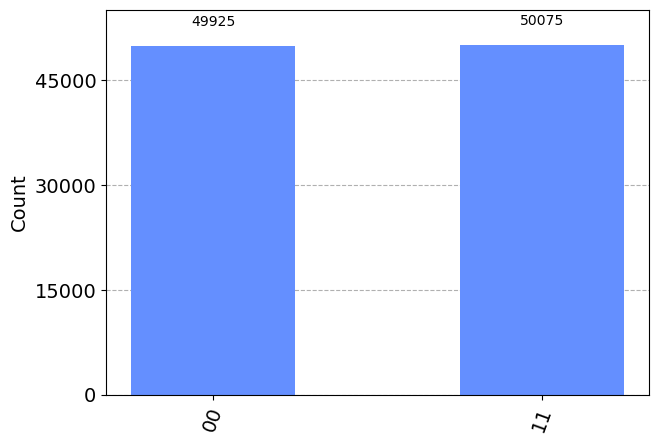

In [19]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

# This is your turn :-) Create a Quantum circuit representing the state ψ here below

$ ψ  = 1/2 (|00> + |01> + |10> + |11>) $

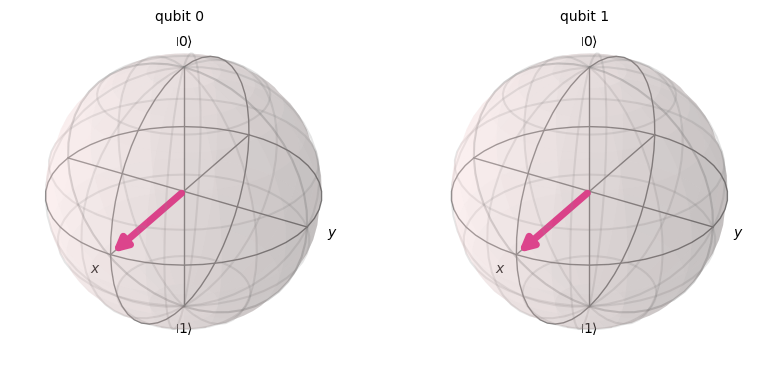

In [20]:
𝜆1=1/2
𝜆2=1/2

ψ = qiskit.quantum_info.Statevector([𝜆1,𝜆2,𝜆1,𝜆2], dims=4)
ψ.draw('bloch')